In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

--------------------------------------------------------------------------------
### Mostramos 9 imagenes random (1 por clase), estas imagenes seran usadas para probar los modelos despues
--------------------------------------------------------------------------------

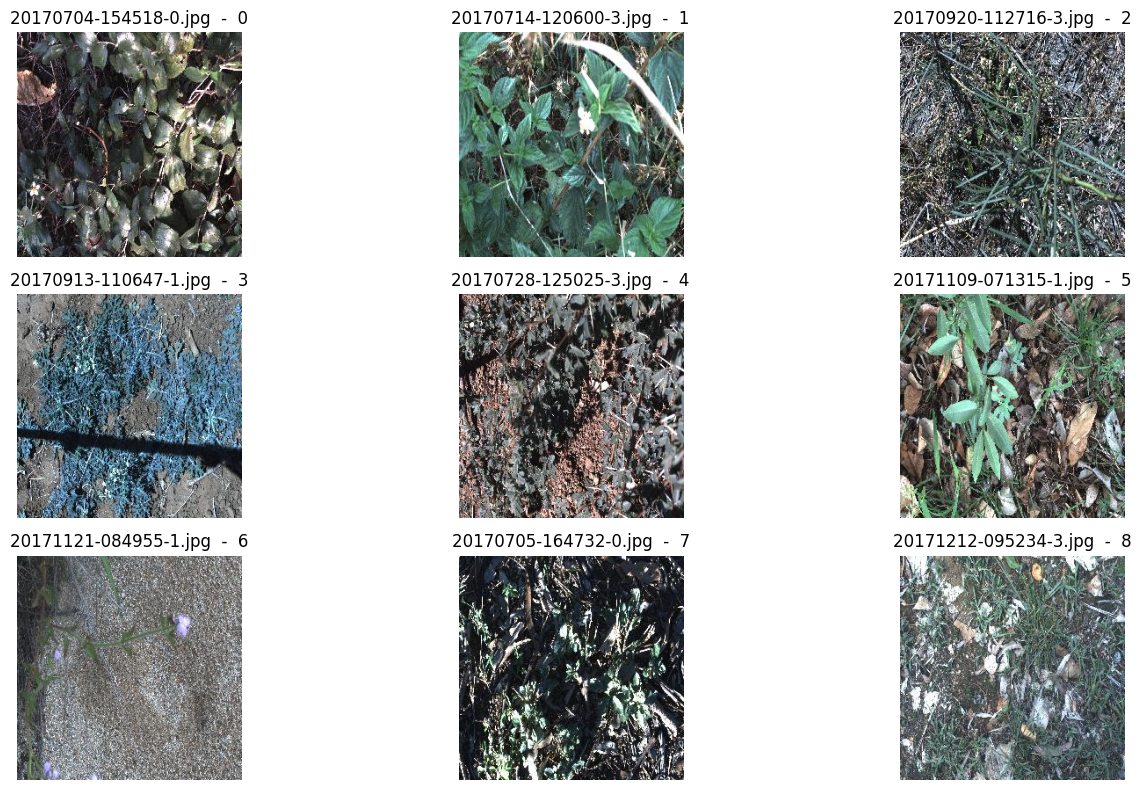

In [ ]:
rutaDataset = '/content/drive/MyDrive/Final/imagenes100'

imagenes_por_carpeta = {}

#recorrer datset
for root, _, files in os.walk(rutaDataset):
    for file in sorted(files):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            carpeta = os.path.basename(root)
            if carpeta not in imagenes_por_carpeta:
                imagenes_por_carpeta[carpeta] = []
            imagenes_por_carpeta[carpeta].append(os.path.join(root, file))


imagenesRandom = []
imagenesRandomLabels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
for carpeta in sorted(imagenes_por_carpeta.keys()):
    if imagenes_por_carpeta[carpeta]:
        rand = random.randint(0, len(imagenes_por_carpeta[carpeta]) - 1)
        imagenesRandom.append(imagenes_por_carpeta[carpeta][rand])

plt.figure(figsize=(15, 8))
for i, imagen in enumerate(imagenesRandom):
    img = plt.imread(imagen)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(imagen) + "  -  " + str(i))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #normalizacion

#Cargamos desde la ruta
#Las carpetas de 0 a 7 tienen maleza, la de 8 no
data_generator = datagen.flow_from_directory(
    rutaDataset,
    target_size=(224, 224), #resize
    batch_size=32,
    class_mode='sparse',  #Asignamos todas las lables segun
    shuffle=True
)

Found 900 images belonging to 9 classes.


In [ ]:
#ResNet pre-entrenado, solo para extraer las features, no clasificacion
resNetBase = ResNet50(weights='imagenet', include_top=False, pooling='avg')

features, labels = [], []

for imagenesBatch, labelsBatch in data_generator:
    featuresBatch = resNetBase.predict(imagenesBatch)  # Extraer características
    features.append(featuresBatch)
    labels.append(labelsBatch)
    if len(features) * data_generator.batch_size >= data_generator.samples: #detener cuando se acaba el dataset
        break

#numpy arr
features = np.vstack(features)
labels = np.hstack(labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5

--------------------------------------------------------------------------------
# **a) Crear un sistema que determine la presencia de maleza (clasificación binaria)**
--------------------------------------------------------------------------------

In [ ]:
#Convertir a Binario -> Maleza= 1 , vacio = 0
binary_labels = np.where(labels < 8, 1, 0)

#train test
X_trainBinario, X_testBinario, y_trainBinario, y_testBinario = train_test_split(features, binary_labels, test_size=0.2, random_state=42)

#KNN
#3 vecinos dio los mejores resultados
knnBinario = KNeighborsClassifier(n_neighbors=3)
knnBinario.fit(X_trainBinario, y_trainBinario)

y_predBinario = knnBinario.predict(X_testBinario)
print("Predicción binaria del modelo")
print("Accuracy:", accuracy_score(y_testBinario, y_predBinario))
print("Classification Report:\n", classification_report(y_testBinario, y_predBinario))

Predicción binaria del modelo
Accuracy: 0.8833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.19      0.32        26
           1       0.88      1.00      0.94       154

    accuracy                           0.88       180
   macro avg       0.94      0.60      0.63       180
weighted avg       0.90      0.88      0.85       180



--------------------------------------------------------------------------------
### Ahora probamos el modelo Knn con las imagenes random ya obtendidas
--------------------------------------------------------------------------------

In [ ]:
#obtenemos las caracteristicas de las imagenes Random
featuresImagenesRandom = []

for imagen_path in imagenesRandom:
    img = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    feature = resNetBase.predict(img_array)
    featuresImagenesRandom.append(feature)

featuresImagenesRandom = np.vstack(featuresImagenesRandom)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


In [ ]:
#obtenemos los labels binarios, de 0 a 7 = maleza, 8 = vacio
imagenesRandomLabelsBinarias = []

for imagen_path in imagenesRandom:
    carpeta = os.path.basename(os.path.dirname(imagen_path))
    imagenesRandomLabelsBinarias.append(1 if int(carpeta) < 8 else 0)

Predicción binaria con las imagenes random
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         8

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



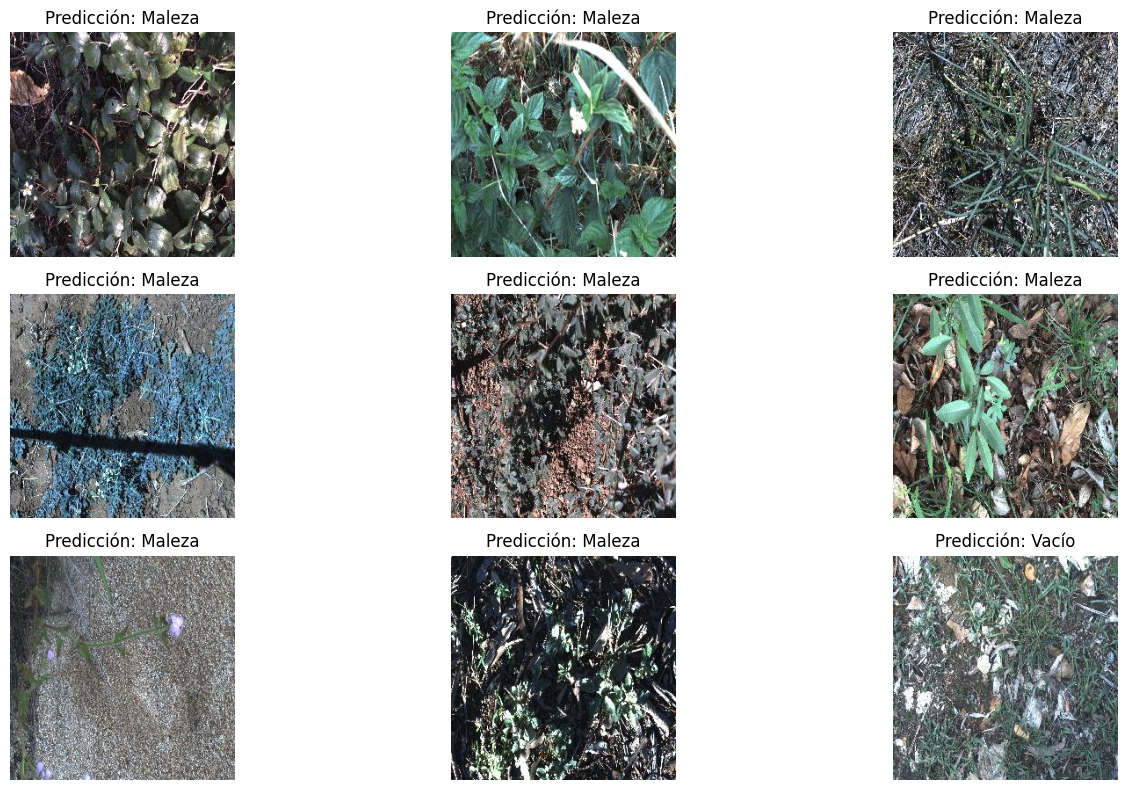

In [ ]:
#predecir con el modelo knn Binario
y_pred_testBinario = knnBinario.predict(featuresImagenesRandom)

print("Predicción binaria con las imagenes random")
print("Accuracy:", accuracy_score(imagenesRandomLabelsBinarias, y_pred_testBinario))
print("Classification Report:\n", classification_report(imagenesRandomLabelsBinarias, y_pred_testBinario))

plt.figure(figsize=(15, 8))
for i, imagen in enumerate(imagenesRandom[:9]):
    img = plt.imread(imagen)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Predicción: {'Maleza' if y_pred_testBinario[i] == 1 else 'Vacío'}")
    plt.axis('off')

plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------
**# b) Crear un sistema que realice una clasificación multi-label considerando como una clase cada una de las etiquetas proporcionadas en el conjunto de datos.**
--------------------------------------------------------------------------------

In [ ]:
#train test
X_trainMulti, X_testMulti, y_trainMulti, y_testMulti = train_test_split(features, labels, test_size=0.2, random_state=42)

#KNN
#3 vecinos dio los mejores resultados
knnMulti = KNeighborsClassifier(n_neighbors=3)
knnMulti.fit(X_trainMulti, y_trainMulti)

y_predMulti = knnMulti.predict(X_testMulti)
print("Predicción multilabel del modelo")
print("Accuracy:", accuracy_score(y_testMulti, y_predMulti))
print("Classification Report:\n", classification_report(y_testMulti, y_predMulti))

Predicción multilabel del modelo
Accuracy: 0.5944444444444444
Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.54      0.51        26
         1.0       0.48      0.58      0.52        19
         2.0       0.52      1.00      0.68        13
         3.0       0.65      0.79      0.71        19
         4.0       0.74      0.78      0.76        18
         5.0       0.70      0.78      0.74        18
         6.0       0.65      0.59      0.62        22
         7.0       0.50      0.42      0.46        19
         8.0       1.00      0.19      0.32        26

    accuracy                           0.59       180
   macro avg       0.64      0.63      0.59       180
weighted avg       0.65      0.59      0.57       180



Predicción multilabel con las imagenes random
Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1

    accuracy                           0.78         9
   macro avg       0.67      0.78      0.70         9
weighted avg       0.67      0.78      0.70         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


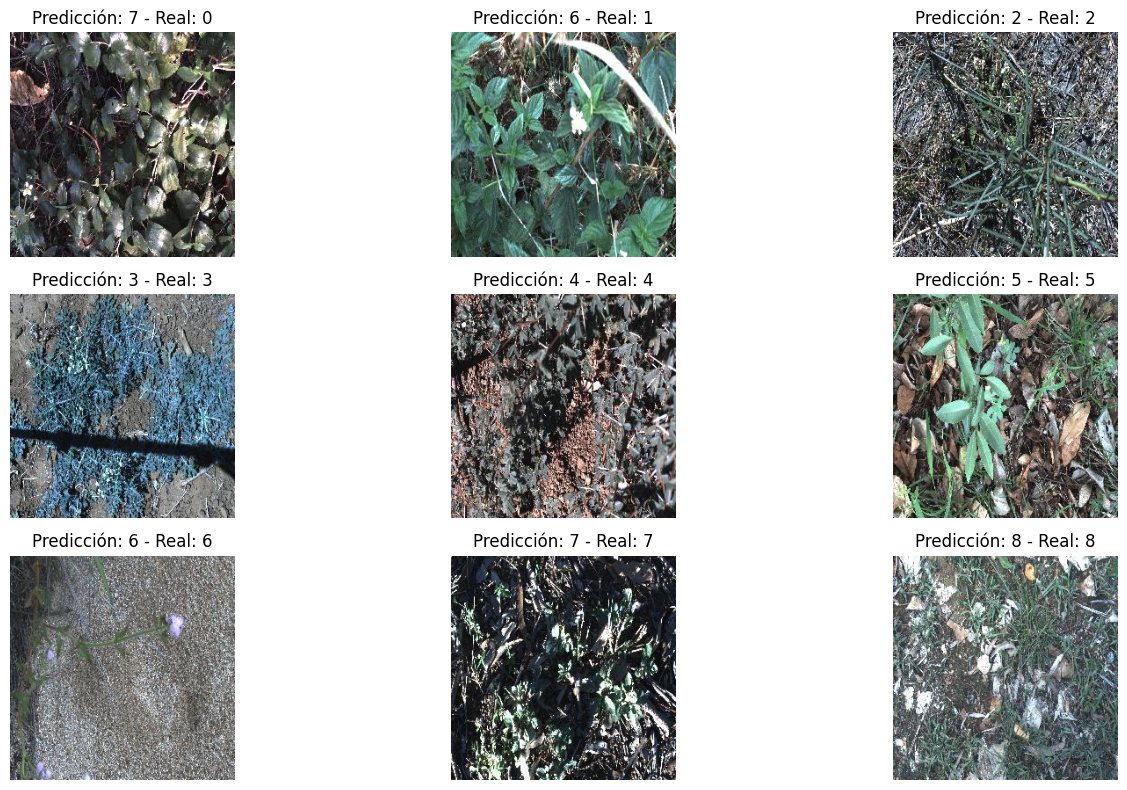

In [ ]:
#predecir con el modelo knn MultiLabel
y_pred_testMulti = knnMulti.predict(featuresImagenesRandom)

print("Predicción multilabel con las imagenes random")
print("Accuracy:", accuracy_score(imagenesRandomLabels, y_pred_testMulti))
print("Classification Report:\n", classification_report(imagenesRandomLabels, y_pred_testMulti))

plt.figure(figsize=(15, 8))
for i, imagen in enumerate(imagenesRandom[:9]):
    img = plt.imread(imagen)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Predicción: {int(y_pred_testMulti[i])} - Real: {imagenesRandomLabels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()